<a href="https://colab.research.google.com/github/chaurasiauttkarsh/Convolution-Neural-Network-Projects/blob/master/Signed_Language_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the data**

```
Signed Language Recognition from Kaggle
```



The data is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

In [1]:
from google.colab import files
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv




```
Extracting the Data
```



In [5]:
import csv
import numpy as np

def get_data(filename):
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                # print("Ignoring first line")
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)




```
Visualising the data
```



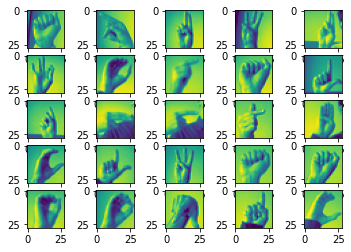

In [6]:
from random import randint
import matplotlib.pyplot as plt

f, axarr = plt.subplots(5,5)

for x in range(5):
  for y in range(5):
    value = randint(0, len(training_images))
    axarr[x, y].imshow(training_images[value])



```
Expanding one more dimension for convolution
```



In [0]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

**Building the model**

**Importing the libraries**

In [8]:
import tensorflow as tf

**Defining the model**

In [9]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________

**Compiling the model**

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.train.AdamOptimizer(),
              metrics=['acc'])

**Preprocessing using ImageDataGenerator**

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)


**Training the model**

In [12]:
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.save("rps.h5")

Epoch 1/15
858/857 [==============================] - 16s 19ms/step - loss: 2.8747 - acc: 0.1341 - val_loss: 2.0597 - val_acc: 0.3713
Epoch 2/15
858/857 [==============================] - 10s 11ms/step - loss: 2.2207 - acc: 0.3041 - val_loss: 1.5120 - val_acc: 0.5262
Epoch 3/15
858/857 [==============================] - 10s 12ms/step - loss: 1.8377 - acc: 0.4155 - val_loss: 1.1543 - val_acc: 0.5909
Epoch 4/15
858/857 [==============================] - 10s 12ms/step - loss: 1.5992 - acc: 0.4861 - val_loss: 1.0893 - val_acc: 0.6352
Epoch 5/15
858/857 [==============================] - 10s 11ms/step - loss: 1.4265 - acc: 0.5327 - val_loss: 0.9362 - val_acc: 0.7202
Epoch 6/15
858/857 [==============================] - 10s 11ms/step - loss: 1.3104 - acc: 0.5670 - val_loss: 0.8295 - val_acc: 0.7111
Epoch 7/15
858/857 [==============================] - 10s 11ms/step - loss: 1.2143 - acc: 0.5980 - val_loss: 0.9697 - val_acc: 0.6516
Epoch 8/15
858/857 [==============================] - 10s 11ms

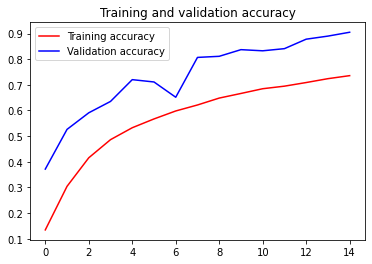

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()